In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, TreeSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.independencies import IndependenceAssertion


df = pd.read_csv("CVD_cleaned.csv")
print(f'dfset contains {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

/home/filippo/Documents/FAIKR-Module3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dfset contains 308854 rows and 19 columns


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
print(len(df.columns))
df.columns

19


Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


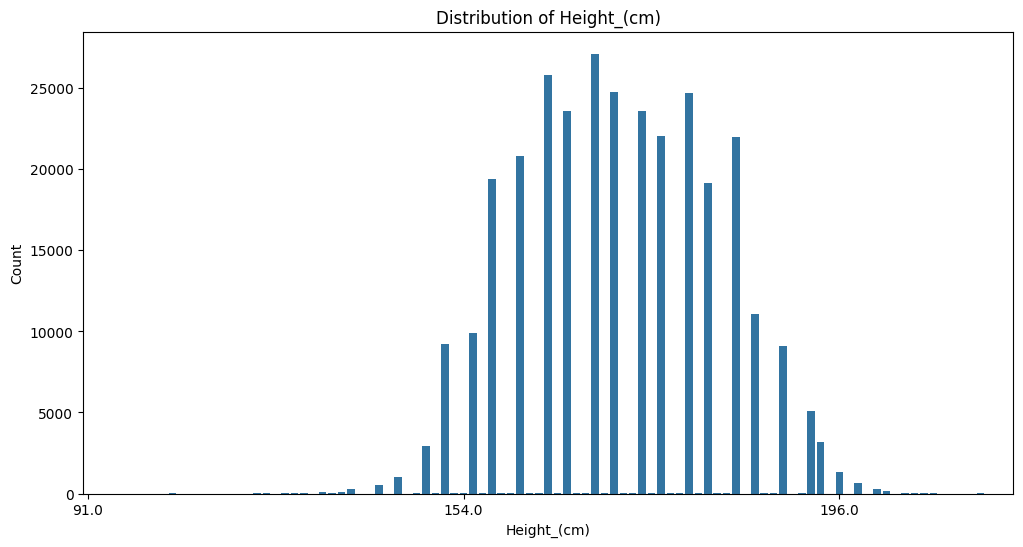

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


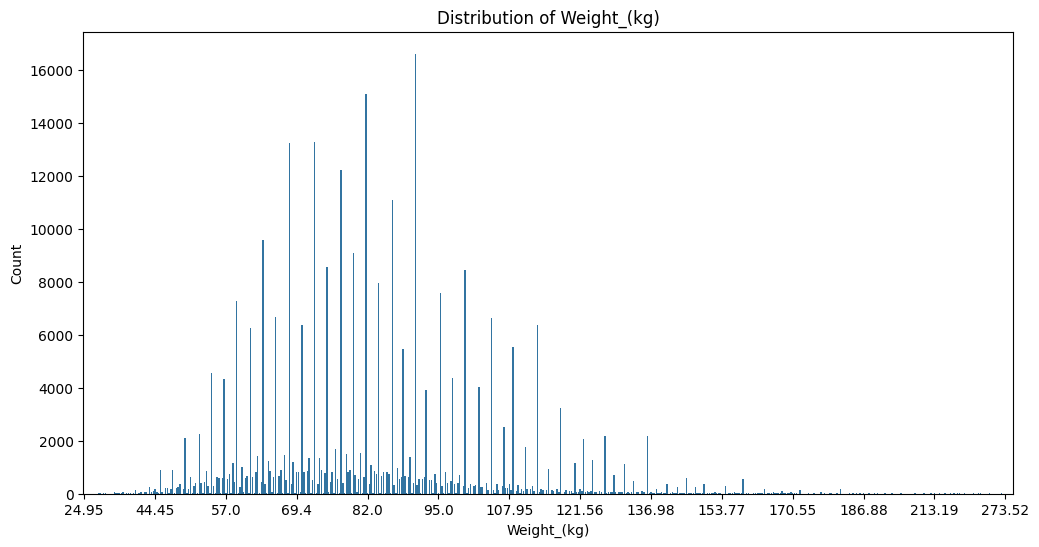

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


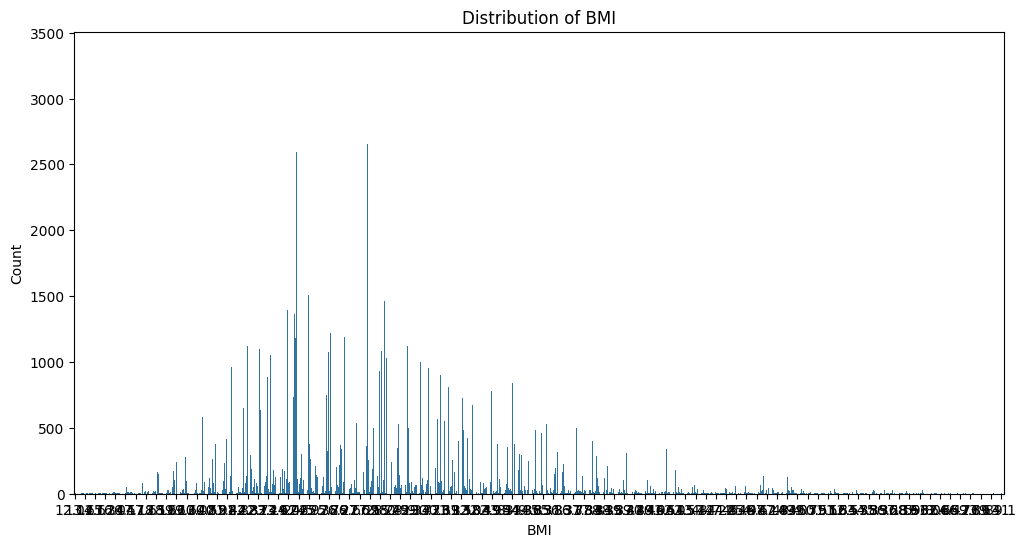

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


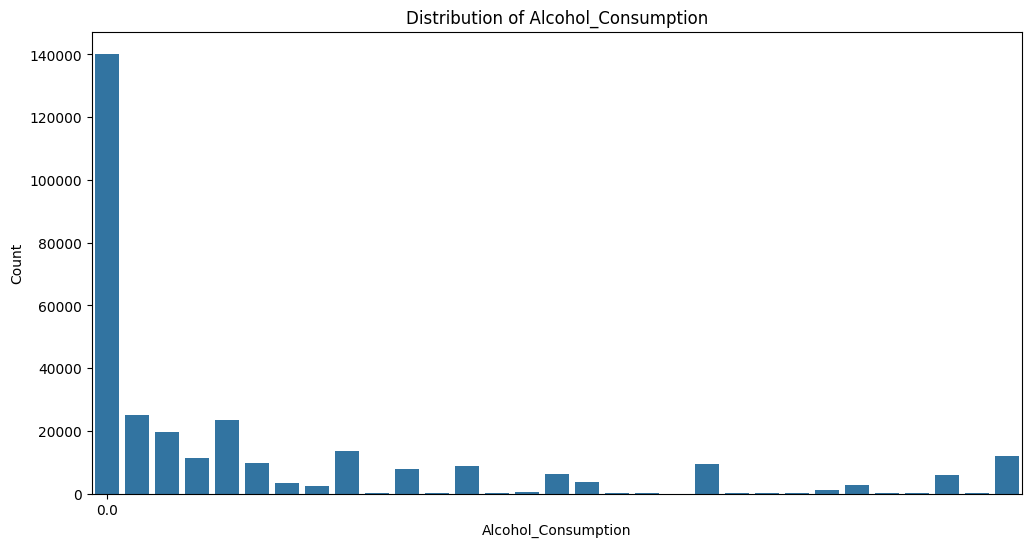

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


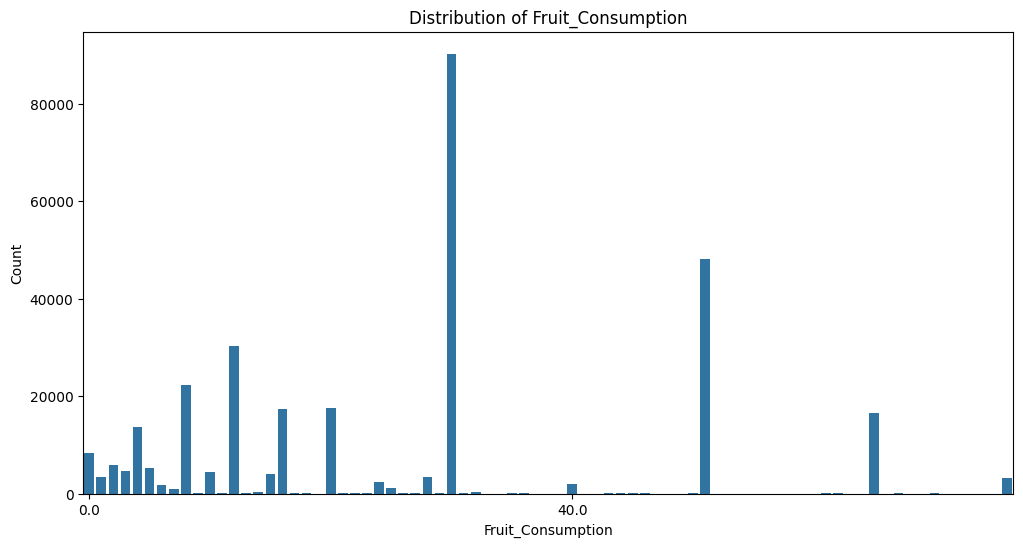

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


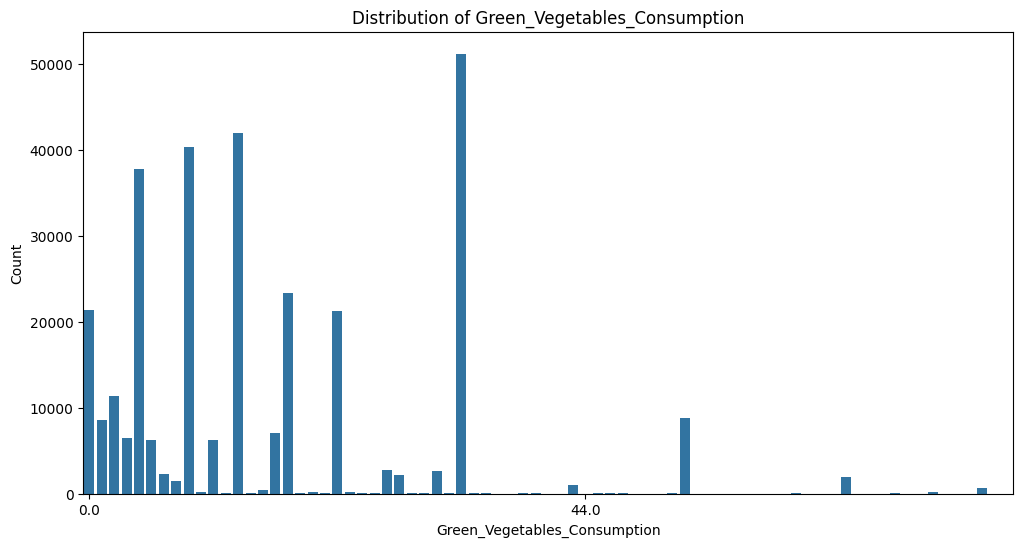

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


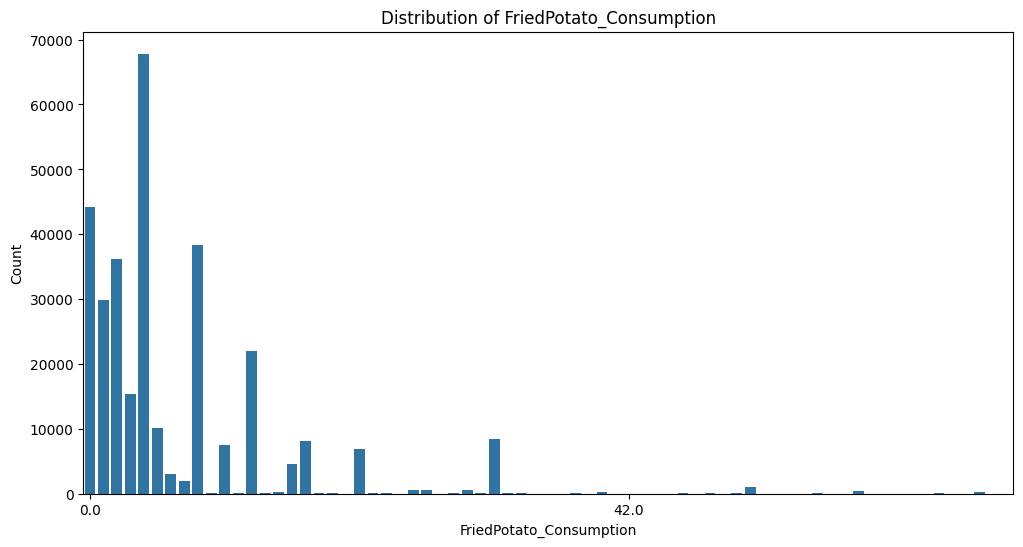

In [5]:
cols_to_discretize = [
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption',
]

for col in cols_to_discretize:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=df[col])
    ticks = ax.get_xticks()
    ax.set_xticks(ticks[::40])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
colonne = ['Height_(cm)', 'Weight_(kg)', 'BMI']

# Inizializza il discretizzatore
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

# Applica la discretizzazione
df_discretizzato = df.copy()
df_discretizzato[colonne] = discretizer.fit_transform(df[colonne])



# Discretize 'Alcohol_Consumption'


# Discretize 'Fruit_Consumption'

# Discretize 'Green_Vegetables_Consumption'

# Discretize 'FriedPotato_Consumption'



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


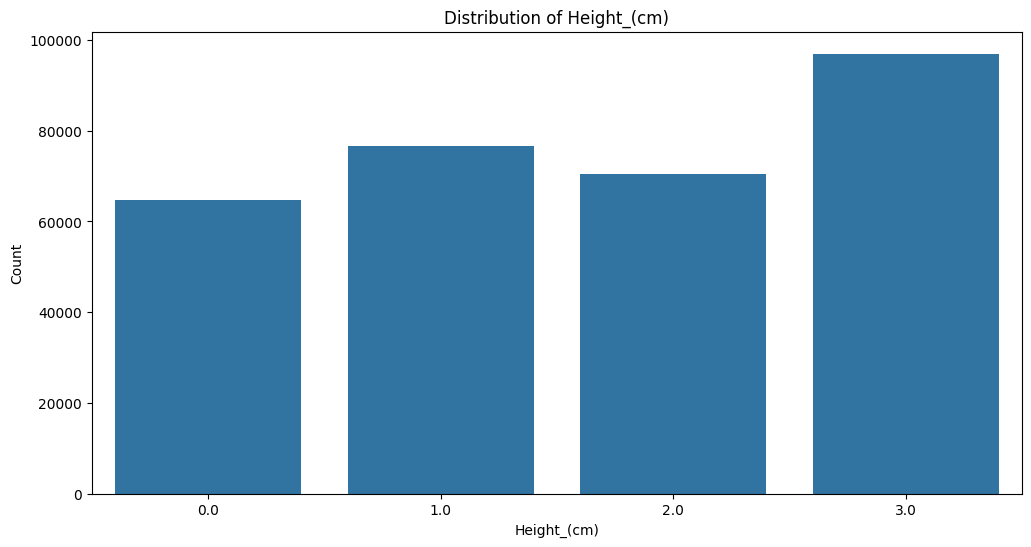

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


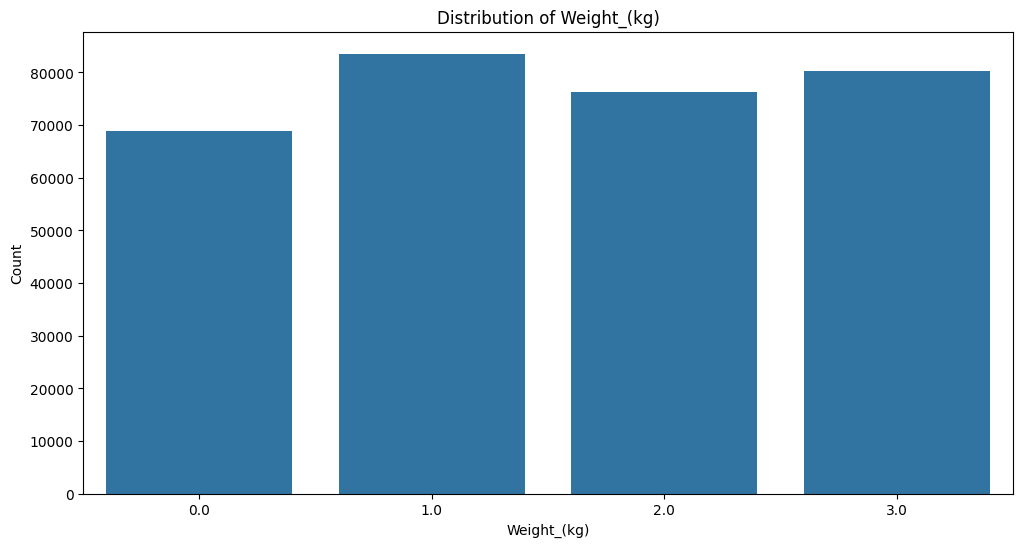

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


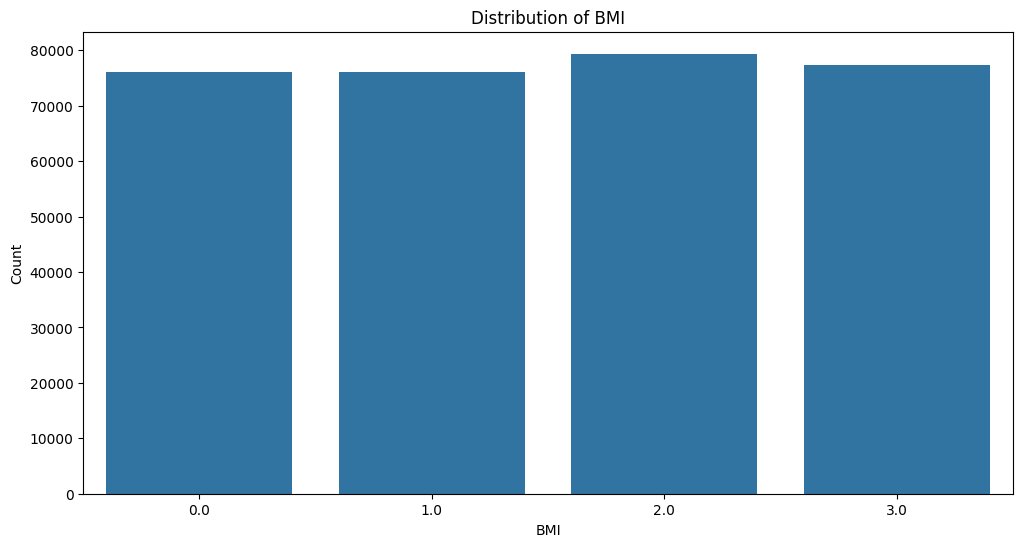

In [8]:
for col in colonne:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=df_discretizzato[col])
    ticks = ax.get_xticks()
    # ax.set_xticks(ticks[::40])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

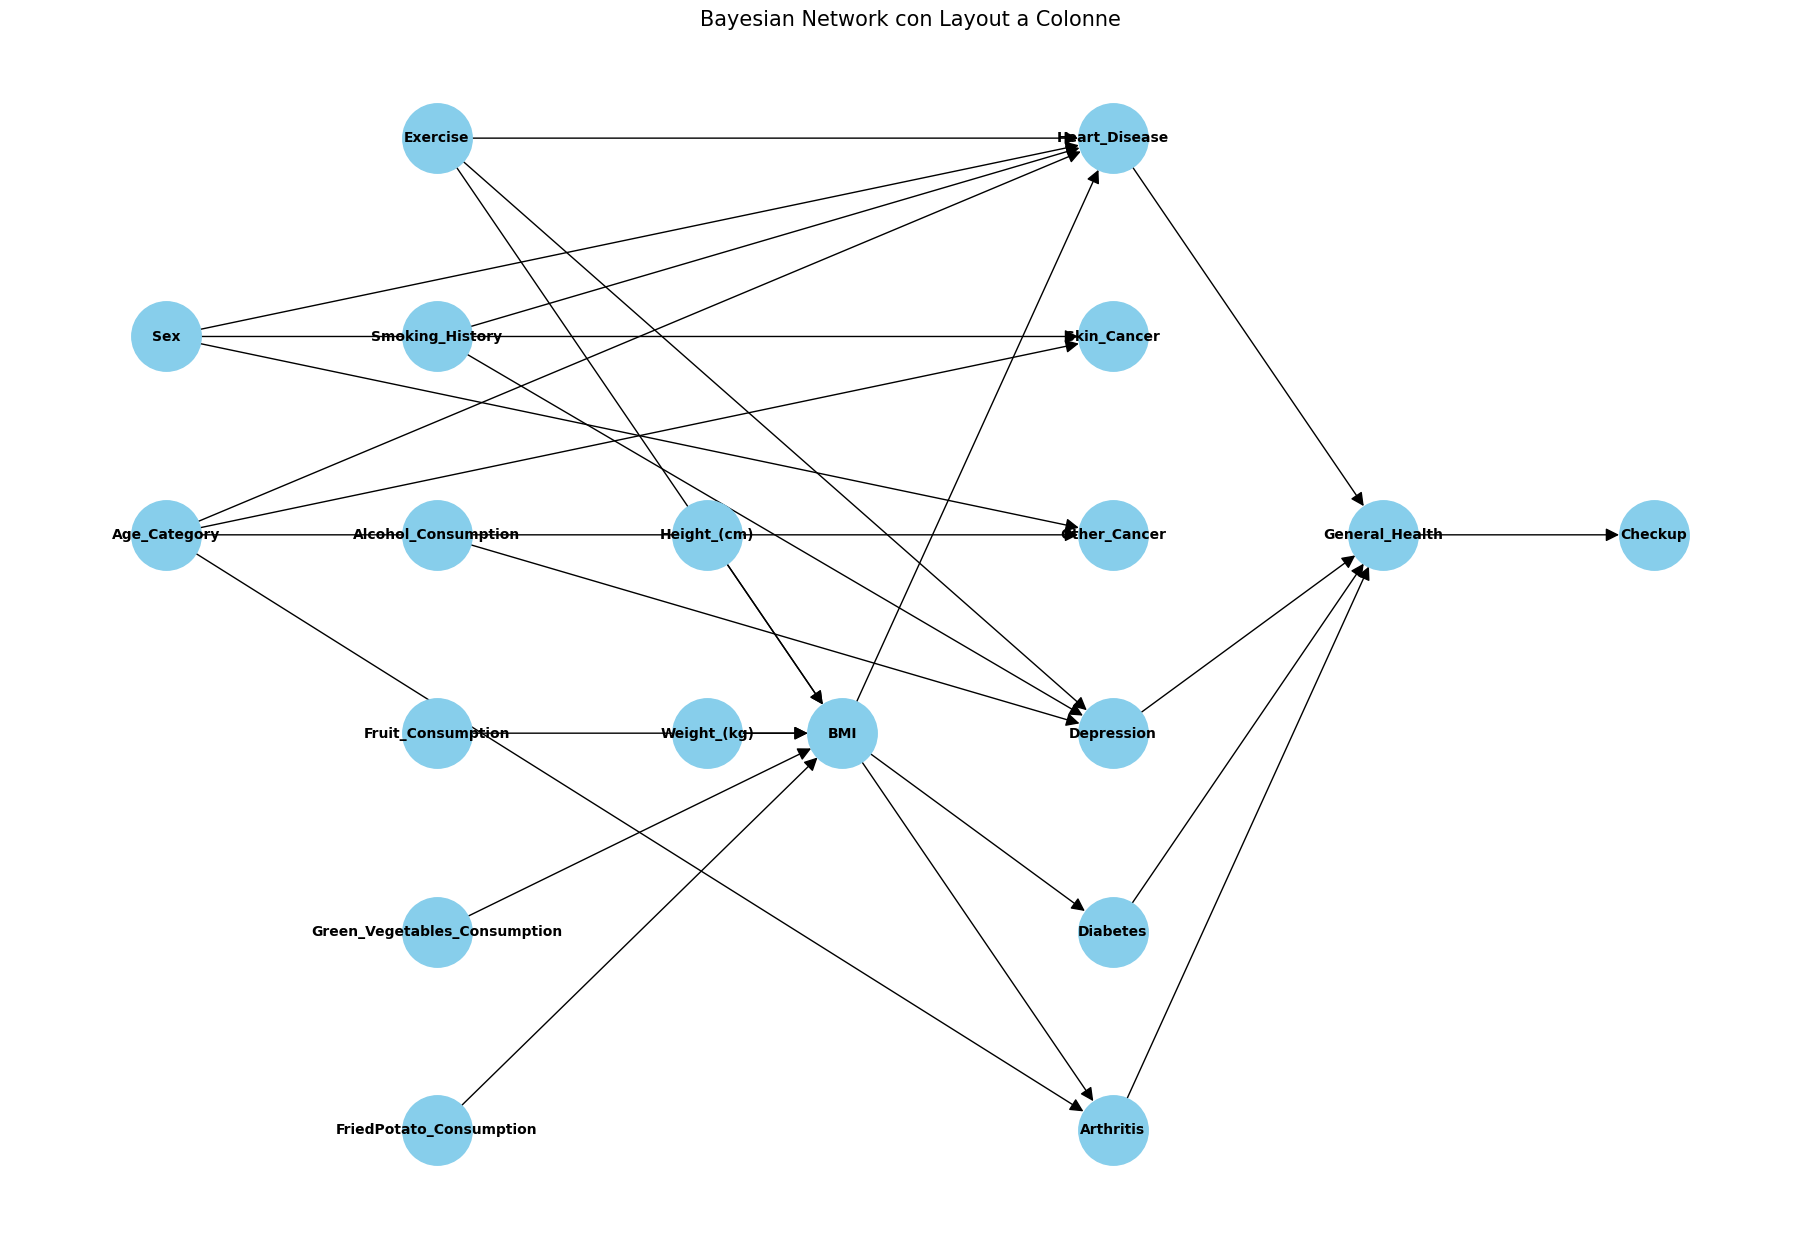

In [18]:
model = BayesianModel([
    # Da altezza e peso a BMI
    ('Height_(cm)', 'BMI'),
    ('Weight_(kg)', 'BMI'),
    
    # Da stile di vita a BMI e condizioni di salute
    ('Exercise', 'BMI'),
    ('Exercise', 'Heart_Disease'),
    ('Exercise', 'Depression'),
    ('Smoking_History', 'Heart_Disease'),
    ('Smoking_History', 'Depression'),
    ('Alcohol_Consumption', 'Depression'),
    ('Fruit_Consumption', 'BMI'),
    ('Green_Vegetables_Consumption', 'BMI'),
    ('FriedPotato_Consumption', 'BMI'),
    
    # BMI influenza diverse malattie
    ('BMI', 'Heart_Disease'),
    ('BMI', 'Diabetes'),
    ('BMI', 'Arthritis'),
    
    # Età e sesso influenzano condizioni mediche
    ('Age_Category', 'Heart_Disease'),
    ('Age_Category', 'Skin_Cancer'),
    ('Age_Category', 'Other_Cancer'),
    ('Age_Category', 'Arthritis'),
    ('Sex', 'Heart_Disease'),
    ('Sex', 'Skin_Cancer'),
    ('Sex', 'Other_Cancer'),
    
    # Le condizioni di salute influenzano la salute generale
    ('Heart_Disease', 'General_Health'),
    ('Diabetes', 'General_Health'),
    ('Depression', 'General_Health'),
    ('Arthritis', 'General_Health'),
    
    # General_Health influenza i check-up
    ('General_Health', 'Checkup')
])

pos = {
    # Colonna 1: Fattori di base
    'Sex': (0, 2),
    'Age_Category': (0, 1),

    # Colonna 2: Stile di vita e dieta
    'Exercise': (2, 3),
    'Smoking_History': (2, 2),
    'Alcohol_Consumption': (2, 1),
    'Fruit_Consumption': (2, 0),
    'Green_Vegetables_Consumption': (2, -1),
    'FriedPotato_Consumption': (2, -2),

    # Colonna 3: Misure fisiche
    'Height_(cm)': (4, 1),
    'Weight_(kg)': (4, 0),
    'BMI': (5, 0),

    # Colonna 4: Condizioni mediche
    'Heart_Disease': (7, 3),
    'Skin_Cancer': (7, 2),
    'Other_Cancer': (7, 1),
    'Depression': (7, 0),
    'Diabetes': (7, -1),
    'Arthritis': (7, -2),

    # Colonna 5: Output
    'General_Health': (9, 1),
    'Checkup': (11, 1)
}

# Disegno del grafo
plt.figure(figsize=(18, 12))
G = nx.DiGraph(model.edges())
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="skyblue",
        font_size=10, font_weight="bold", arrowsize=20)

plt.title("Bayesian Network con Layout a Colonne", fontsize=15)
plt.axis("off")
plt.show()
